In [129]:
#in case you are using google colab
# !pip install yt
# !pip install f90nml

In [ ]:
import yt
import f90nml
import pandas
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from matplotlib.pyplot import cm

In [ ]:
def velocity(field, data):
  return data['m2'].to_ndarray() / data["rho"].to_ndarray()

# Links about the Fields

https://yt-project.org/doc/reference/field_list.html#field-list

https://yt-project.org/doc/analyzing/fields.html#known-field-types

https://education.molssi.org/python-data-analysis/03-data-fitting/index.html

# Data processing

In [ ]:
#datafiles is the path of your files

def data_processing(a,b, datafiles):
  #a: give here your start snapshot
  #b: give here your last snapshot
  # Time array depends on time interval between snapshots: in the case 0.5s
  time = [i for i in np.arange(a/2,b/2,0.5)]
  data = []

  for i in range(a,b): #loop over the snapshots
    ds = yt.load(datafiles % i)
    ds.add_field(('gas', "y_velocity"), function=velocity ,units='', sampling_type='cell')
    all = ds.covering_grid(level=3, left_edge=[0, 0.0, 0.0], dims=ds.domain_dimensions)

    v = all['gas', 'y_velocity']
    v = np.squeeze(v,axis=2) 

    ft = np.fft.rfft(v, axis=0) #Fourier transform of the velocity
    
    mode_data = []
    for m in range(1,17): #The 0th is the average, we don't look at that
      test = abs(ft[m][120])  # Here we look at the middle. we have a size of 240, so 120 is the centrum of the snapshot
      mode_data.append(test)
    data.append(mode_data)  #we have a 2d array, where the columns represent the growths of each mode

  # make it an numpy array
  growth_data = np.array(data) 
  growth_data = growth_data.transpose() # now we have in each row the growth of a mode  
  return growth_data, time

In [128]:
#### All of our datasets #####
## MAKE SURE YOU CHANGE THE PATH TO YOURS" #####
# data_B1, time_B1 = data_processing(30,51,"/content/drive/MyDrive/B=0.006/16_modes_B_0.006%04d.dat")
# data_B2, time_B2 = data_processing(30,51,"/content/drive/MyDrive/B=0.007/16_modes_B_0.007%04d.dat")
# data_B3, time_B3 = data_processing(30,59,"/content/drive/MyDrive/B=0.008/16_modes_B_0.008%04d.dat")

In [127]:
# data_B4, time_B4 = data_processing(30,54,"/content/drive/MyDrive/B=0.009/16_modes_B_0.009%04d.dat")

# data_B0, time_B0 = data_processing(30,59,"/content/drive/MyDrive/B=0/16_modes_per_6%04d.dat")
# data_B5, time_B5 = data_processing(30,50,"/content/drive/MyDrive/6_0.005/a%04d.dat")
# data_B6, time_B6 = data_processing(30,51,"/content/drive/MyDrive/6_0.0085/a%04d.dat")
# data_B7, time_B7 = data_processing(30,61,"/content/drive/MyDrive/6_0.01/a%04d.dat")

# Plots every mode for 1 value of B

In [ ]:
#This plots every mode for 1 value of B
def plot_growths(timeX, dataX, B):
  fig = plt.figure(figsize=(12,7))
  ax = plt.subplot(111)
  #making of the plot
  colors = cm.rainbow(np.linspace(0, 1, len(dataX)))
  mode = np.arange(1,len(dataX)+1,1)

  for i, mode_growth in enumerate(dataX):
    ax.plot(timeX,dataX[i], c = colors[i], label = "mode " + str(mode[i]))

  plt.legend(bbox_to_anchor=(1.05, 1))
  axes = plt. gca()
  axes.xaxis.label.set_size(18)
  axes.yaxis.label.set_size(18)
  axes.title
  plt.xlabel("Time [s]")
  plt.ylabel("Amplitude")
  plt.title("growth of the modes with B={}".format(B), fontsize=22)
  plt.savefig("All_Modes_B={}.png".format(B), bbox_inches='tight')
  plt.show()

# Calculation of the growth rates

In [ ]:
#This is the block where the growth rates are measured of each mode, by fitting and exponential to them

#log fit!
from scipy.optimize import curve_fit
import numpy as np
import math
def exponential(x,A,B):
  y = A * np.exp(B*x)
  return y

def fit(time_data, growth_data):
  rate_off_growths = []
  for i, mode_growth in enumerate(growth_data):
    
    parameters, covariance = curve_fit(exponential, time_data, mode_growth)
    fit_A = parameters[0]
    fit_B = parameters[1]
    rate_off_growths.append(fit_B)
   
  #   plt.figure()
  #   fit_y = [exponential(step, fit_A,fit_B) for step in time_data ]
  #   plt.plot(time_data, mode_growth[15:], 'o', label='data mode ' +'{}'.format(i+1) )
  #   plt.plot(time_data, fit_y, '-', label='fit')
  #   plt.legend()
  # plt.show()
  return rate_off_growths

# Comparison of the growths

In [ ]:
#A comparison is made here by plotting the same mode for different values of B

def compare(chosen_mode):
  #making of the plot:
  colors = cm.rainbow(np.linspace(0, 1, 8))
  fig = plt.figure(figsize=(8,5))
  ax = plt.subplot(111)
  ax.plot(time_B0,data_B0[i], c = colors[0], label = "B= " + "0")
  ax.plot(time_B5,data_B5[i], c = colors[5], label = "B= " + "0.005")
  ax.plot(time_B1,data_B1[i], c = colors[1], label = "B= " + "0.006")
  ax.plot(time_B2,data_B2[i], c = colors[2], label = "B= " + "0.007")
  ax.plot(time_B3,data_B3[i], c = colors[3], label = "B= " + "0.008")
  ax.plot(time_B6,data_B6[i], c = colors[6], label = "B= " + "0.0085")
  ax.plot(time_B4,data_B4[i], c = colors[4], label = "B= " + "0.009")
  ax.plot(time_B7,data_B7[i], c = colors[7], label = "B= " + "0.01")

  #plot appearance
  plt.legend(bbox_to_anchor=(1.05, 1))
  plt.xlabel("Time [s]",fontsize=16)
  plt.ylabel("Amplitude",fontsize=16)
  plt.title("Comparison of the growth for mode {}".format(i+1),fontsize=20)
  plt.savefig("mode{}_All_B_Values.png".format(chosen_mode), bbox_inches='tight')
  plt.show()

# **The plots.**

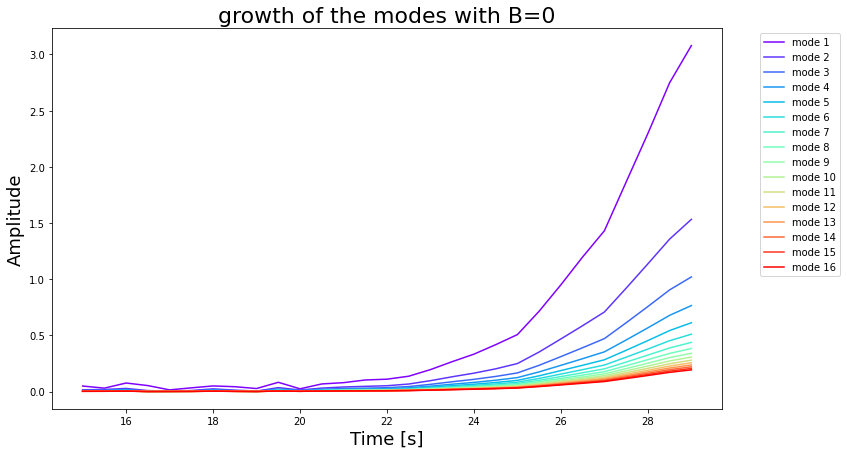

[0.4230020979630002, 0.4266978647468048, 0.4274692846408694, 0.4277391194356083, 0.42785180525182054, 0.4279116539522034, 0.4279491077287622, 0.427973727438568, 0.42799029620026174, 0.42800235395374814, 0.4280106007480168, 0.428016816161806, 0.42802048806602083, 0.42802340345566753, 0.42802346264583097, 0.42802335364868316]


In [ ]:
plot_growths(time_B0,data_B0,0)
rate_of_growths_B0= fit(time_B0,data_B0)
print(rate_of_growths_B0)

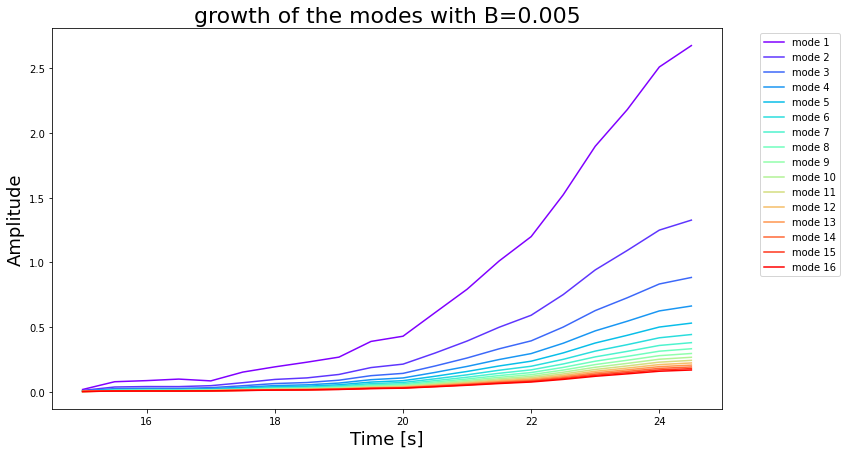

[0.3735585588149971, 0.37617266823387874, 0.3766425071309947, 0.37682631280378576, 0.3769030873698626, 0.3769447304902394, 0.37696974675231826, 0.3769843034125089, 0.3769950969565398, 0.37699950968525264, 0.37700394785212554, 0.3770049181357389, 0.37700355300695493, 0.3769997465823771, 0.376995063244537, 0.37698405621170317]


In [ ]:
plot_growths(time_B5,data_B5,0.005)
rate_of_growths_B5= fit(time_B5,data_B5)
print(rate_of_growths_B5)
rate_of_growths_B5_norm = np.array(rate_of_growths_B5)/ np.array(rate_of_growths_B0)

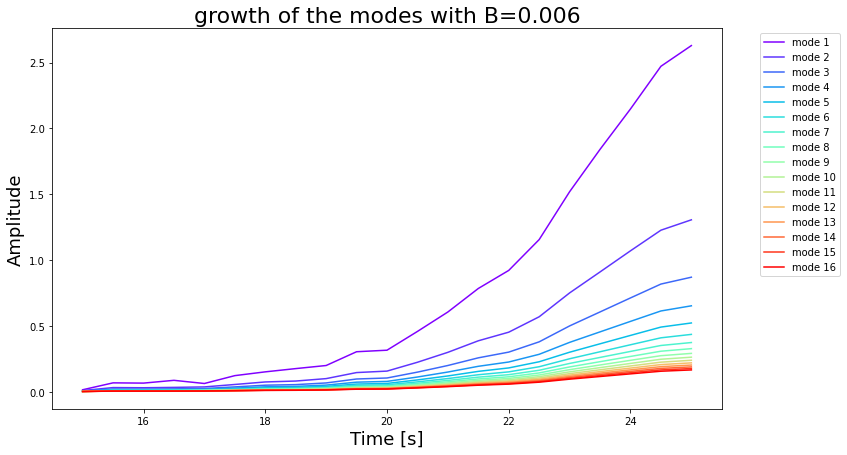

[0.3768851717935039, 0.3798415518445656, 0.3803942487167289, 0.38055036836481415, 0.38062285326672324, 0.38066323496859994, 0.38068644390220185, 0.38070174769228976, 0.38071064736996413, 0.38071728468559396, 0.38071992199976773, 0.3807205080307038, 0.3807197940470847, 0.3807165805782266, 0.38071068116099865, 0.3807020676295354]


In [ ]:
plot_growths(time_B1,data_B1,0.006)
rate_of_growths_B1= fit(time_B1,data_B1)
print(rate_of_growths_B1)
rate_of_growths_B1_norm = np.array(rate_of_growths_B1)/ np.array(rate_of_growths_B0)

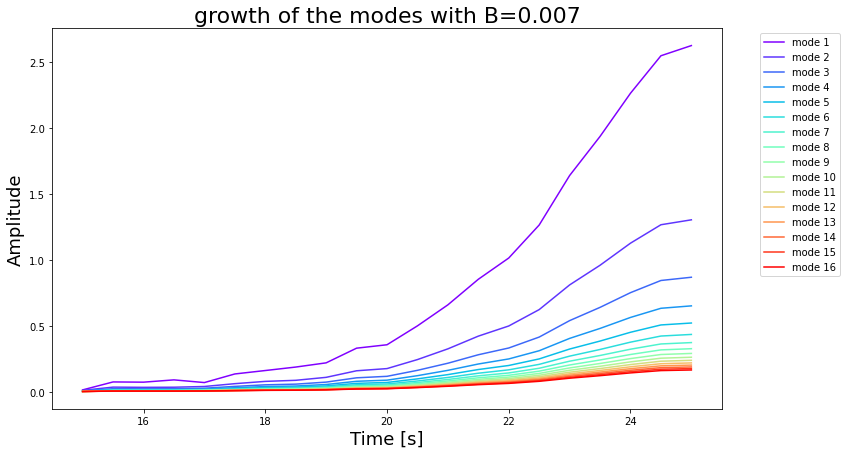

[0.35989152876298003, 0.3626622837243167, 0.3630712116457018, 0.3631961939327749, 0.3632554845208882, 0.36328815192047165, 0.36330662256051216, 0.3633188202355119, 0.36332654121436536, 0.3633313673785941, 0.36333368154793994, 0.3633348651241262, 0.3633351145562474, 0.36333284626805656, 0.36332634796757296, 0.3633193472444721]


In [ ]:
plot_growths(time_B2,data_B2,0.007)
rate_of_growths_B2= fit(time_B2,data_B2)
print(rate_of_growths_B2)
rate_of_growths_B2_norm = np.array(rate_of_growths_B2)/ np.array(rate_of_growths_B0)

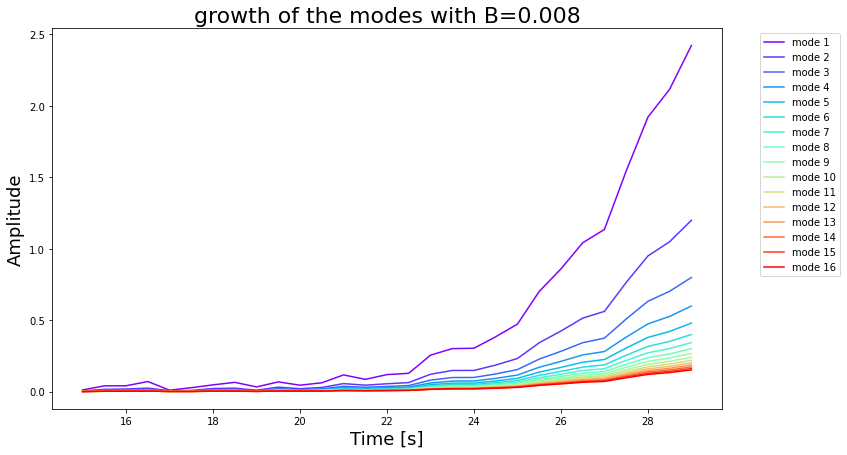

[0.38476137032523355, 0.38799654883473245, 0.3888936645581646, 0.38896712479110873, 0.38904572171906693, 0.38908709111519274, 0.3891151774424221, 0.3891316936076188, 0.3891419841302912, 0.38914908067422105, 0.38915320482827653, 0.389153266031954, 0.38915310537149794, 0.38914909221456484, 0.38914259439341636, 0.3891312562222198]


In [ ]:
plot_growths(time_B3,data_B3,0.008)
rate_of_growths_B3= fit(time_B3,data_B3)
print(rate_of_growths_B3)
rate_of_growths_B3_norm = np.array(rate_of_growths_B3)/ np.array(rate_of_growths_B0)

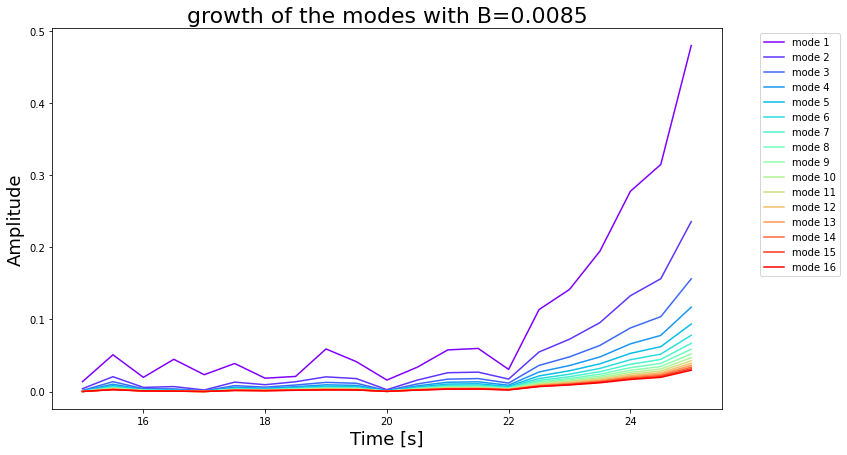

[0.5779493582692876, 0.5966937094155542, 0.5976225404142895, 0.5983162896128863, 0.5986976373822532, 0.5988869850832448, 0.5990130319341752, 0.5991030593934688, 0.599167202895521, 0.5992145793955537, 0.5992502369049939, 0.5992600000893588, 0.5992502301120395, 0.5992143596429315, 0.5991674236010069, 0.5991030609392151]


In [ ]:
plot_growths(time_B6,data_B6,0.0085)
rate_of_growths_B6= fit(time_B6,data_B6)
print(rate_of_growths_B6)
rate_of_growths_B6_norm = np.array(rate_of_growths_B6)/ np.array(rate_of_growths_B0)

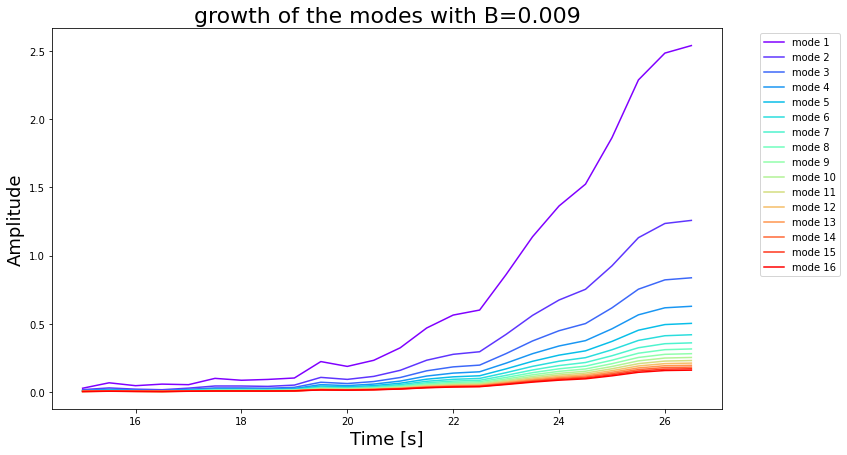

[0.34563850534867563, 0.3481874587228544, 0.3482474356479395, 0.3484337908979009, 0.3484863967161687, 0.3485137263520777, 0.34852864035208186, 0.34853871763975064, 0.3485462949464103, 0.34854966717963537, 0.3485517038609955, 0.34855432583879, 0.34855146840888995, 0.34855077515023036, 0.34854570828089426, 0.3485385746878792]


In [ ]:
plot_growths(time_B4,data_B4,0.009)
rate_of_growths_B4=fit(time_B4,data_B4)
print(rate_of_growths_B4)
rate_of_growths_B4_norm = np.array(rate_of_growths_B4)/ np.array(rate_of_growths_B0)

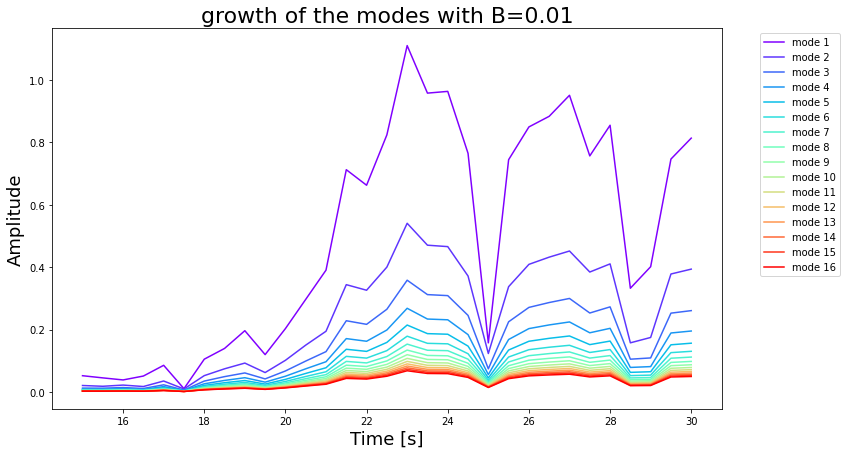

[0.09028457232961273, 0.0897309872119111, 0.08972271529215671, 0.08967867423472729, 0.08965808269570988, 0.08965327149908181, 0.08964795089547369, 0.0896399783938122, 0.08963870235359088, 0.08964265133654861, 0.08964306521394713, 0.08963622994859738, 0.08964261424465211, 0.0896430233039055, 0.08963758088561079, 0.08963935623418287]


In [ ]:
plot_growths(time_B7,data_B7,0.01)
rate_of_growths_B7= fit(time_B7,data_B7)
print(rate_of_growths_B7)
rate_of_growths_B7_norm = np.array(rate_of_growths_B7)/ np.array(rate_of_growths_B0)

#Evolution of growth rate with increasing value of B, normalized on B = 0

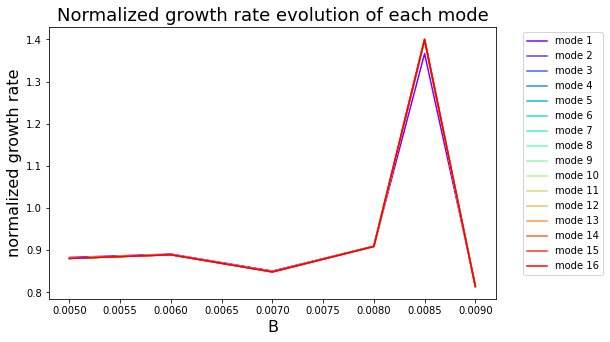

In [ ]:

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
colors = cm.rainbow(np.linspace(0, 1, len(rate_of_growths_B0)))

for i in range(len(rate_of_growths_B0)): #16 modes
  rates = [rate_of_growths_B5_norm[i],rate_of_growths_B1_norm[i], rate_of_growths_B2_norm[i], rate_of_growths_B3_norm[i],rate_of_growths_B6_norm[i],rate_of_growths_B4_norm[i]]
  ax.plot([0.005,0.006,0.007,0.008,0.0085,0.009],rates, c = colors[i], label = "mode {}".format(i+1))

  #plot appearance
plt.legend(bbox_to_anchor=(1.05, 1))

plt.xlabel("B", fontsize=16)
plt.ylabel("normalized growth rate", fontsize=16)
plt.title("Normalized growth rate evolution of each mode", fontsize=18)
plt.savefig("Evolution_growth_rate.png", bbox_inches='tight')
plt.show()

# The 16 plots of comparison

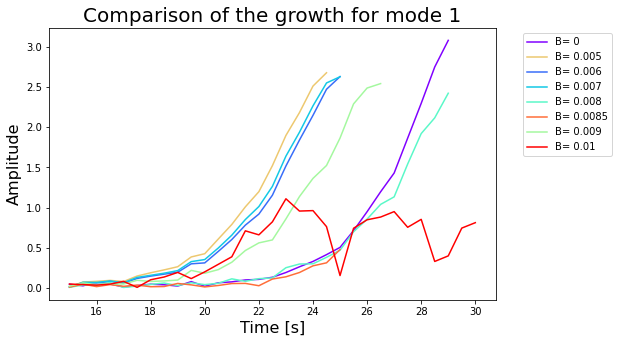

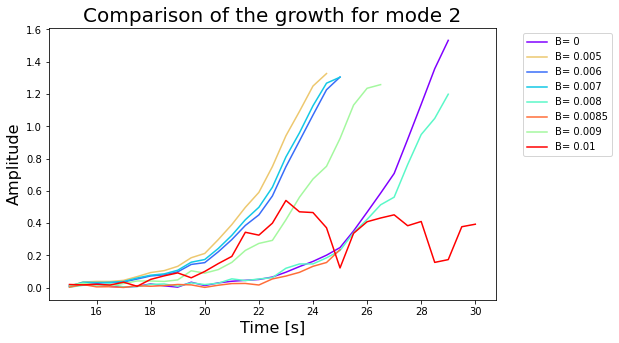

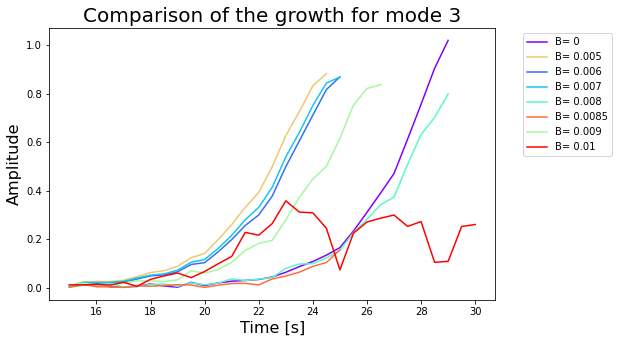

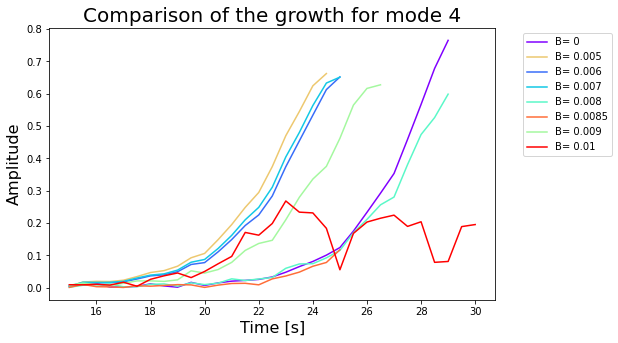

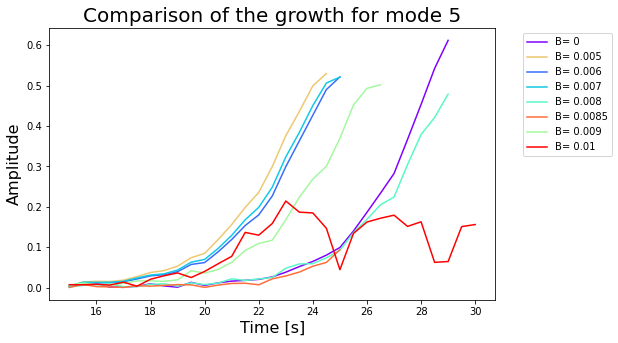

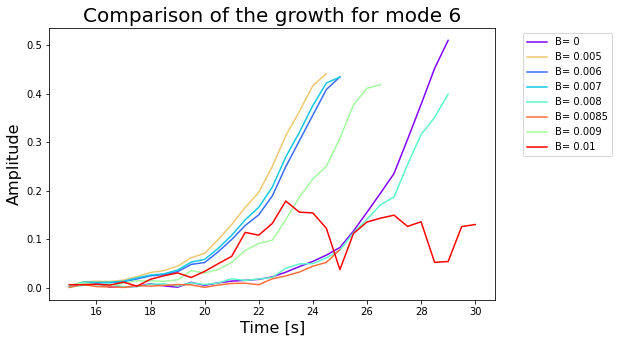

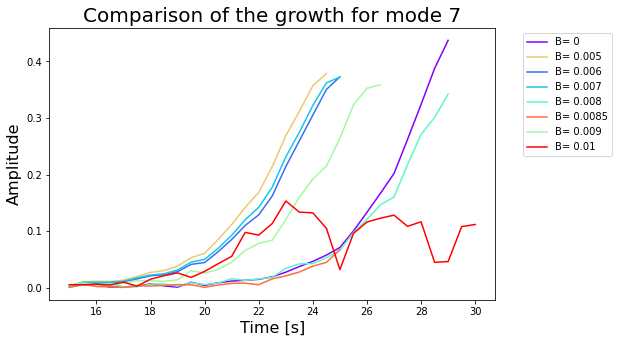

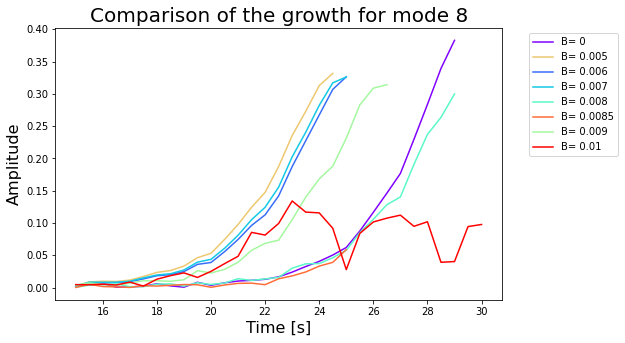

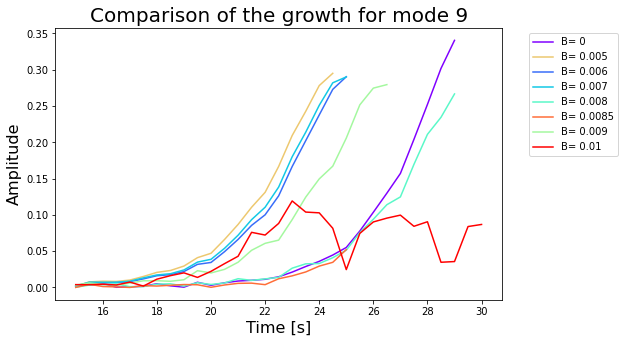

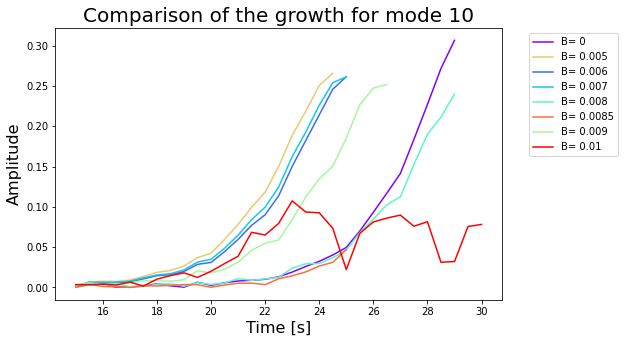

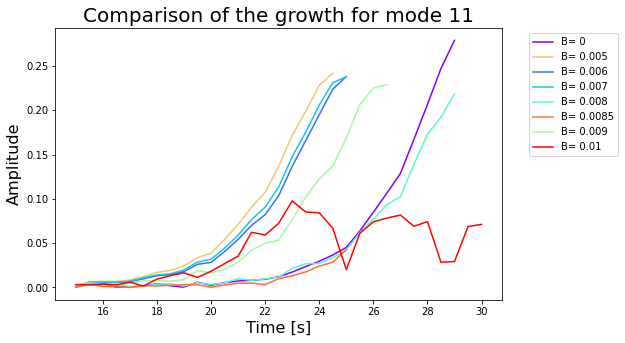

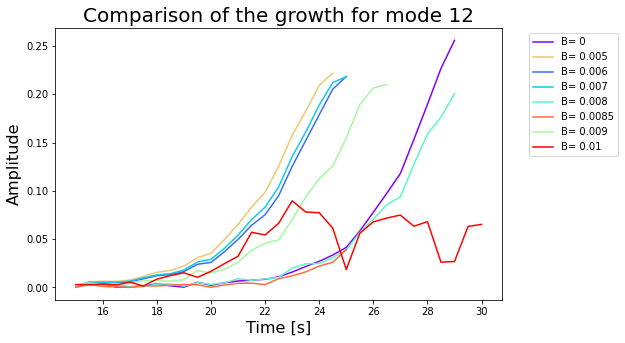

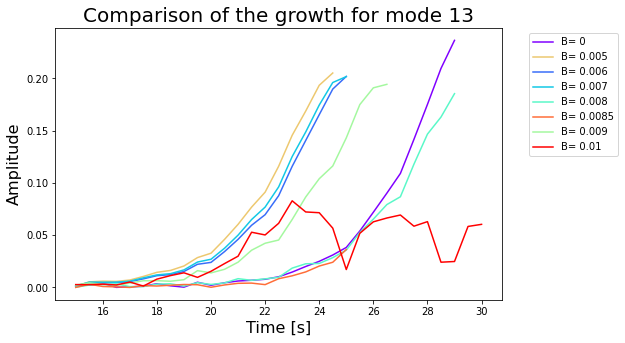

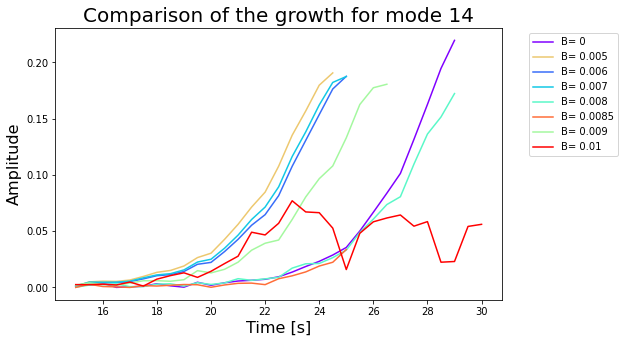

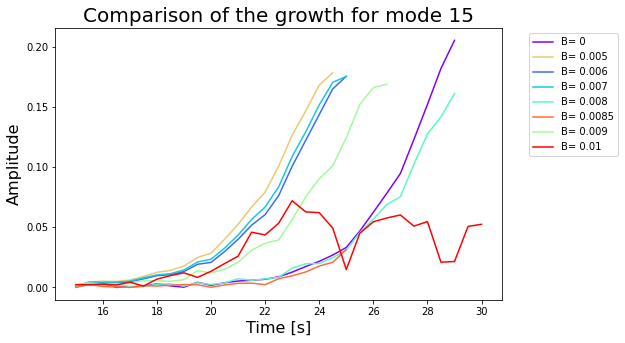

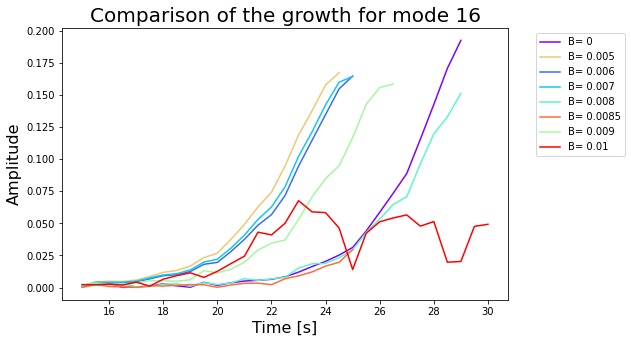

In [ ]:
for i in range(0,len(data_B3)):
  compare(i)